In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Lambda-School-Labs/best-places-to-live-ds/master/data/best_places.csv')

# Look at only 256 largest cities
reduced_df = df[df['population'] >= 93298]

In [0]:
ranked_df = pd.read_csv('https://github.com/Lambda-School-Labs/best-places-to-live-ds/raw/master/ranked_df.csv')

## Composit bar graph

In [0]:
ranked_df = pd.read_csv('https://github.com/Lambda-School-Labs/best-places-to-live-ds/raw/master/ranked_df.csv')

In [0]:
# random factors as dummy user input (actually, I'm the dummy these are my top factors)
factors=['cost_of_living', 'score_outdoors', 'gdp-growth-rate-telescore', 'score_education']
ranked_df[factors]

In [0]:
df_copy = ranked_df.copy()
df_copy['score'] = df_copy[factors].mean(axis=1)

In [0]:
df_copy.query("short_name == 'Beaverton'")[factors].to_numpy().tolist()[0]

[0.119140625, 0.52734375, 0.501953125, 0.15625]

In [0]:
df_copy.query("short_name == 'Gresham'")[factors].to_numpy()

array([[0.16796875, 0.62890625, 0.50195312, 0.0703125 ]])

In [0]:
import plotly.graph_objects as go
factors=['cost_of_living', 'score_outdoors', 'gdp-growth-rate-telescore', 'score_education', 'score_commute']

y_Beaverton = df_copy.query("short_name == 'Beaverton'")[factors].to_numpy().tolist()[0]
y_Gresham = df_copy.query("short_name == 'Gresham'")[factors].to_numpy().tolist()[0]
y_Portland = df_copy.query("short_name == 'Portland'")[factors].to_numpy().tolist()[0]
y_Pittsburgh = df_copy.query("short_name == 'Pittsburgh'")[factors].to_numpy().tolist()[0]

fig = go.Figure(data=[
    go.Bar(name='Beaverton', x=factors, y=y_Beaverton),
    go.Bar(name='Gresham', x=factors, y=y_Gresham),
    go.Bar(name='Portland', x=factors, y=y_Portland),
    go.Bar(name='Pittsburgh', x=factors, y=y_Pittsburgh),
])

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [0]:
import plotly.graph_objects as go

x = ['cost_of_living', 'score_outdoors', 'gdp-growth-rate-telescore', 'score_education', 'score_commute']

y_Beaverton = df_copy.query("short_name == 'Beaverton'")[factors].to_numpy().tolist()[0]
y_Gresham = df_copy.query("short_name == 'Gresham'")[factors].to_numpy().tolist()[0]
y_Portland = df_copy.query("short_name == 'Portland'")[factors].to_numpy().tolist()[0]
y_Pittsburgh = df_copy.query("short_name == 'Pittsburgh'")[factors].to_numpy().tolist()[0]

fig = go.Figure()
fig.add_trace(go.Bar(name = 'Beaverton', x=x, y=y_Beaverton))
fig.add_trace(go.Bar(name = 'Gresham', x=x, y=y_Gresham))
fig.add_trace(go.Bar(name = 'Portland', x=x, y=y_Portland))
fig.add_trace(go.Bar(name = 'Pittsburgh', x=x, y=y_Pittsburgh))

fig.update_layout(barmode='relative', title_text='Top Cities Comparison')
fig.show()

In [0]:
# Next up: write iterable function to add_trace user selected features, cities should be top cities...

In [0]:
# Had trouble getting the list of top cities, so I did this

import numpy as np
df_copy = ranked_df.copy()

x = df_copy[['name']].head(10).values.tolist()
cities = np.swapaxes(x,0,1).tolist()[0]
cities

# However, it might cause an error if no cities meet the criteria. May need to add try()

['Albuquerque, NM',
 'Anchorage, AK',
 'Atlanta, GA',
 'Athens, GA',
 'Sandy Springs, GA',
 'Roswell, GA',
 'Austin, TX',
 'Round Rock, TX',
 'Baltimore, MD',
 'Columbia, MD']

In [0]:
def rankify2(df, factors, top=10, quant=.60):
    df_copy = df.copy()
    for i in factors:
        df_copy = df_copy[df[i] > df_copy[i].quantile(quant)]
    df_copy['score'] = df_copy[factors].mean(axis=1)
    df_copy = df_copy.sort_values('score', ascending=False)

    # retrieve top 20 cities and put them in a list
    x = df_copy[['short_name']].head(top).values.tolist()
    cities = np.swapaxes(x,0,1).tolist()[0]

    # truncate df row-wise to just the top 20 cities
    df2 = df_copy.loc[df_copy['short_name'].isin(cities)]
    
    # initialize columns to be masked
    columns = ['short_name', 'score'] + factors

    # truncate the dataframe column-wise to the ones in 'columns'
    df3 = df2[columns]

    df3 = df3.sort_values('score', ascending=False)
    df3 = df3.drop(['score'],axis='columns')
    
    return df3

In [0]:
factors=['cost_of_living', 'score_outdoors', 
         'score_education', 'score_commute']

df = rankify2(ranked_df, factors=factors)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,short_name,cost_of_living,score_outdoors,score_education,score_commute
218,San Jose,0.611328,0.968750,0.996094,0.843750
155,New York City,0.861328,0.632812,0.890625,0.988281
237,Chinatown,0.861328,0.718750,0.988281,0.640625
156,Brooklyn,0.861328,0.585938,0.781250,0.941406
169,Astoria,0.861328,0.582031,0.796875,0.832031
238,Vacaville,0.861328,0.695312,0.984375,0.527344


In [0]:
y = df.query("short_name == 'San Jose'")[factors].values.tolist()[0]
y

[0.611328125, 0.96875, 0.99609375, 0.84375]

In [0]:
# Not working: trying to loop through each feature

import plotly.graph_objects as go

x = ['cost_of_living', 'score_outdoors', 'score_education', 'score_commute']

fig = go.Figure()

for city in df['short_name']:
  y = df[df['short_name'] == city][x].values.tolist()[0]
  fig.add_trace(go.Bar(name=city, x=x, y=y)


# y_Beaverton = df_copy.query("short_name == 'Beaverton'")[factors].to_numpy().tolist()[0]
# y_Gresham = df_copy.query("short_name == 'Gresham'")[factors].to_numpy().tolist()[0]
# y_Portland = df_copy.query("short_name == 'Portland'")[factors].to_numpy().tolist()[0]
# y_Pittsburgh = df_copy.query("short_name == 'Pittsburgh'")[factors].to_numpy().tolist()[0]

# fig.add_trace(go.Bar(name = 'Beaverton', x=x, y=y_Beaverton))
# fig.add_trace(go.Bar(name = 'Gresham', x=x, y=y_Gresham))
# fig.add_trace(go.Bar(name = 'Portland', x=x, y=y_Portland))
# fig.add_trace(go.Bar(name = 'Pittsburgh', x=x, y=y_Pittsburgh))

fig.update_layout(barmode='relative', title_text='Compare Top Cities')
fig.show()

In [0]:
   import chart_studio.plotly as py
   
   x = ['cost_of_living', 'score_outdoors', 'score_education', 'score_commute']
   
   for k, city in enumerate(df['short_name']):
      y = df[df['short_name'] == city][x].values.tolist()[0]
      # print(y)
      trace = go.Bar(x = x,
                         y = y,
                         name = city
                         )
      data = [trace]
      py.iplot(data, filename='stack_plot'+'{:d}'.format(k+1))

PlotlyRequestError: ignored

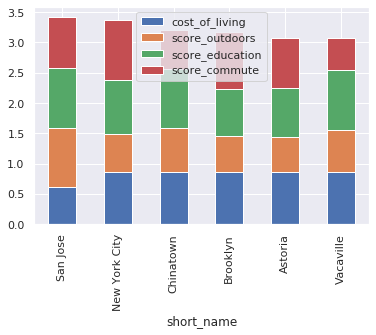

In [0]:
import seaborn as sns
sns.set()
df.set_index('short_name').plot(kind='bar', stacked=True);

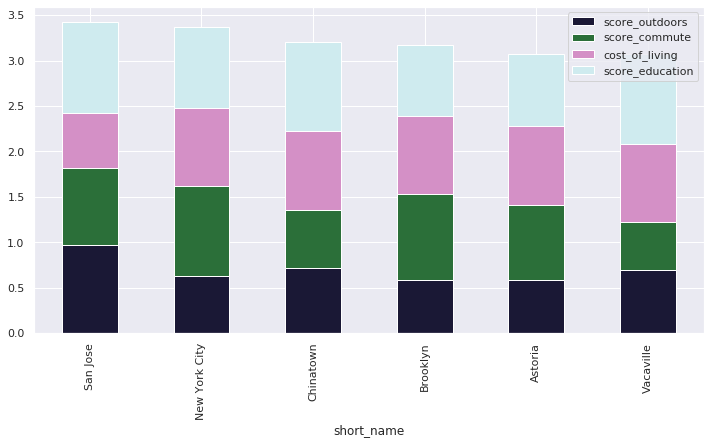

In [0]:
from matplotlib.colors import ListedColormap

df.set_index('short_name')\
  .reindex(df.set_index('short_name').sum().sort_values().index, axis=1)\
  .plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("cubehelix", 8)), 
          figsize=(12,6));

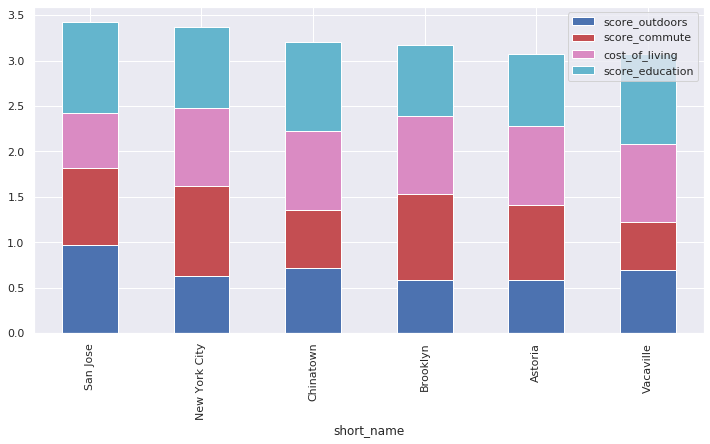

In [0]:
from matplotlib.colors import ListedColormap

df.set_index('short_name')\
  .reindex(df.set_index('short_name').sum().sort_values().index, axis=1)\
  .plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette('deep')), 
          figsize=(12,6));

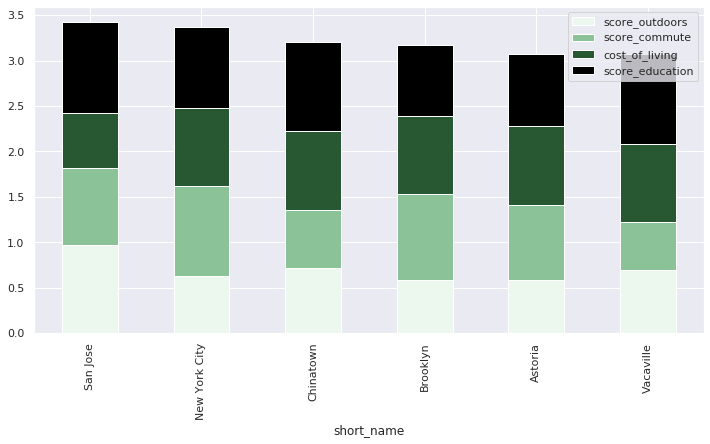

In [0]:
from matplotlib.colors import ListedColormap

df.set_index('short_name')\
  .reindex(df.set_index('short_name').sum().sort_values().index, axis=1)\
  .plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=False)), 
          figsize=(12,6));

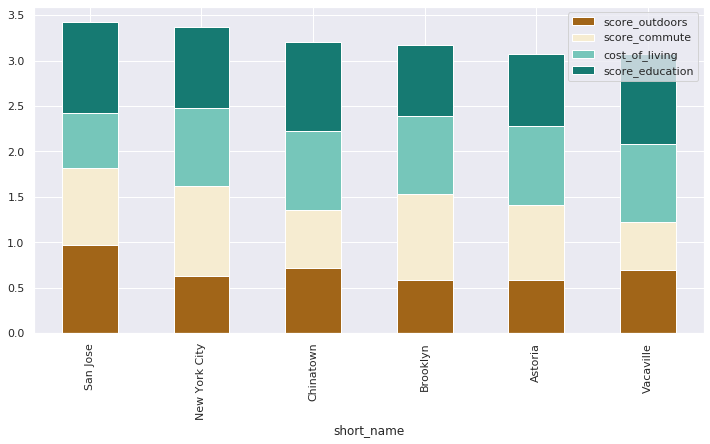

In [0]:
from matplotlib.colors import ListedColormap

df.set_index('short_name')\
  .reindex(df.set_index('short_name').sum().sort_values().index, axis=1)\
  .plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette('BrBG')), 
          figsize=(12,6));

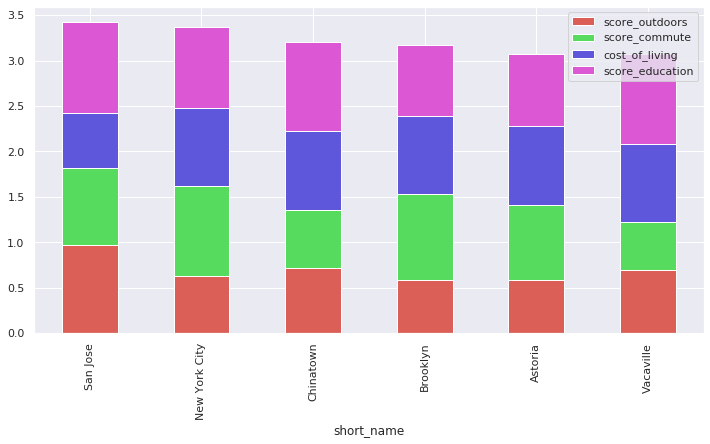

In [0]:
from matplotlib.colors import ListedColormap

df.set_index('short_name')\
  .reindex(df.set_index('short_name').sum().sort_values().index, axis=1)\
  .plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette('hls')), 
          figsize=(12,6));

## Plots for each feature

In [0]:
import pandas as pd

#reduced dataframe re-sorted for visuals
redu_df = pd.read_csv('https://raw.githubusercontent.com/Lambda-School-Labs/best-places-to-live-ds/master/data/redu_df.csv')

In [0]:
# Example Features
x = ['cost_of_living', 'score_outdoors', 'score_education', 'score_commute']

#### Re-sorted data: 

*   256 cities
*   drop unneeded columns


In [0]:
# Most of these are being removed because all entries are the same value
remove = ['country',                   
          'currency-urban-area',       
          'full_name',                 
          'spoken-languages',           
          'lgbt-detail-homosexuality', 
          'lgbt-detail-marriage',      
          'business-freedom',          
          'business-freedom-telescore',
          'corruption-freedom',
          'corruption-freedom-telescore',
          'currency-urban-area-exchange-rate',
          'elderly-people',                   # XD
          'employer-social-taxes-cap-soc-sec',
          'employer-social-taxes-other',
          'employer-social-taxes-soc-sec',
          'english-skills-detail',
          'english-skills-telescore',
          'labor-restrictions',
          'labor-restrictions-telescore',
          'healthcare-life-expectancy',
          'healthcare-life-expectancy-telescore',
          'life-expectancy',
          'median-age',
          'pisa-detail-happiness',
          'pisa-detail-math-high-performers',
          'pisa-detail-math-low-performers',
          'pisa-detail-math-mean-scores',
          'pisa-detail-reading-high-performers',
          'pisa-detail-reading-low-performers',
          'pisa-detail-reading-mean-scores',
          'pisa-detail-science-high-performers',
          'pisa-detail-science-low-performers',
          'pisa-detail-science-mean-scores',
          'pisa-maths-ranking',
          'pisa-ranking',
          'pisa-ranking-telescore',
          'pisa-reading-ranking',
          'pisa-science-ranking',
          ]

maybe_later = ['human-cities-page-urls',         # url to city page
                # 'location',                      # WILL NEED THIS FOR MAPS / split into several columns
                'time_zone',  
                'universities-best-ranked-name', # gives "best" university in the city if exists
                'weather-type',                  # 9 catagories of weather type
                'funding-accelerator-names',     # not sure. Looks like big developers in areas if exist
                # 'photo',                         # Labs15 added this feature -- photo of each city
                'lgbt-detail-adoption',
                'lgbt-detail-age-of-consent',    # lgbt issues are mostly in the format: "Protected, ambigious, not-protected" or simular -- very interesting data
                'lgbt-detail-changing-gender',
                'lgbt-detail-conversion-therapy',
                'lgbt-detail-discrimination',
                'lgbt-detail-donating-blood',
                'lgbt-detail-employment-discrimination',
                'lgbt-detail-housing-discrimination',
                'geoname_id'
                ]

negative = [
            'apartment-rent-large',
            'apartment-rent-medium',
            'apartment-rent-small',
            'avg_commute_time',
            'cost-apples',
            'cost-bread',
            'cost-cappuccino',
            'cost-cinema',
            'cost-fitness-club',
            'cost-import-beer',
            'cost-public-transport',
            'cost-restaurant-meal',
            'cost-taxi',
            'cost_of_living',
            'gun-death-rate',
            'restaurant-price-index',
            'tax-vat',
            'time-overhead-company-taxes',
            'time-to-open-business',
            'unemployment-rate',
            'weather-av-number-rainy-days',
]

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Lambda-School-Labs/best-places-to-live-ds/master/data/best_places.csv')

# Look at only 256 largest cities
redu_df = df[df['population'] >= 93298]

# remove features not being used for this model
redu_df = redu_df.drop(maybe_later + remove, axis='columns')

# This feature is graded ABCDF convert to 12345 bigger being better...
redu_df['avg_commute_time_score'] = redu_df[
                                                'avg_commute_time_score'
                                                ].replace({
                                                      'A':5,
                                                      'B':4,
                                                      'C':3,
                                                      'D':2,
                                                      'F':1 
                                                    })

redu_df.reset_index(inplace=True)
# Fix names of DC and Lee's Summit to be consistent with rest of cities
redu_df.at[253, 'name'] = 'Washington, DC'
redu_df.at[78, 'name'] = 'Lees Summit, MO'

# Negate negative features to face the same direction as others
redu_df[negative] = redu_df[negative].multiply(-1)

# impute NaNs with minimum value ...
redu_df = redu_df.fillna(redu_df.min())

redu_df.shape

(256, 138)

In [0]:
redu_df = redu_df.fillna(redu_df.min()) #.isnull().sum() #, inplace=True)

In [0]:
redu_df.isnull().sum()

index                              0
air-pollution-telescore            0
airport-hub-index-detail           0
airport-hub-telescore              0
apartment-rent-large               0
                                  ..
weather-sunshine-amount            0
workfrom-coworking-spaces-count    0
seaside-seaside                    0
funding-accelerators-detail        0
seaside-waterbody                  0
Length: 138, dtype: int64

In [0]:
# When I'm ready to export csv ... 

from google.colab import files
redu_df.to_csv('redu_df.csv', index=False)

In [0]:
files.download('redu_df.csv')

#### Violin / Swarm Plots

In [0]:
# Impute and Normalize ALL numeric data in df

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Instantiate
mms = MinMaxScaler()

#Isolate numeric columns
numeric = norm_df.select_dtypes('number')
x = numeric.values

# Impute NaNs with means
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(x)
SimpleImputer(add_indicator=False, copy=True, fill_value=None,
        missing_values=np.nan, strategy='mean', verbose=0)
x = imp_mean.transform(x)

# Normalize
x_scaled = mms.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=numeric.columns, index = norm_df.index)
norm_df[numeric.columns] = df_temp

In [0]:
norm_df.head()

In [0]:
norm_df['cost_of_living'].describe()

count    256.000000
mean       0.477500
std        0.248036
min        0.000000
25%        0.320000
50%        0.477500
75%        0.620000
max        1.000000
Name: cost_of_living, dtype: float64

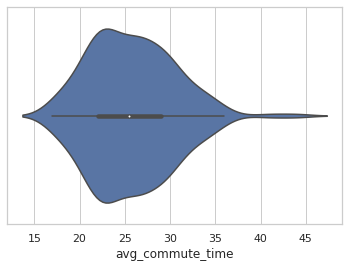

In [0]:
import seaborn as sns

sns.set(style="whitegrid")

ax = sns.violinplot(x=redu_df['avg_commute_time'])

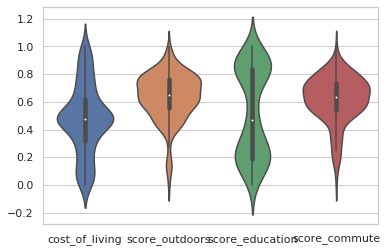

In [0]:
x = ['cost_of_living', 'score_outdoors', 'score_education', 'score_commute']

sns.set(style="whitegrid")

ax = sns.violinplot(data=norm_df[x])

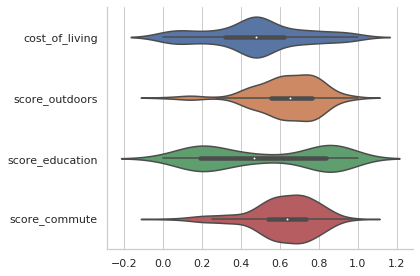

In [0]:
g = sns.catplot(data=norm_df[x], kind="violin", split=True, height=4, aspect=1.5, orient="h");

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


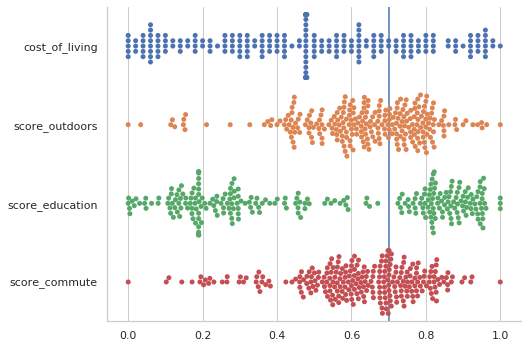

In [0]:
import matplotlib.pyplot as plt
ax = sns.catplot(data=norm_df[x], kind="swarm", split=True, height=5, aspect=1.5, orient="h");
plt.axvline(x=.7)

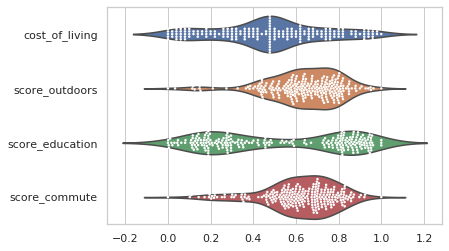

In [0]:
ax = sns.violinplot(data=norm_df[x], height=8, aspect=1.3, orient='h', inner=None)
ax = sns.swarmplot(data=norm_df[x], orient='h', color="white", edgecolor="black", size=2.5)

#### kdeplot with shaded region

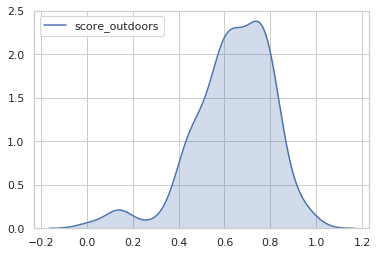

In [0]:
sns.kdeplot(shade=True, data=norm_df['score_outdoors']);

In [0]:
city = 'Portland'
x = redu_df.query('short_name == city')
x

In [0]:
city = 'Portland'
factor = 'score_outdoors'
redu_df.loc[redu_df['short_name'] == city][factor].tolist()[0]

6.3039999999999985

In [0]:
# pip install Image


In [0]:
moo = int(round(ranked_df.loc[ranked_df['short_name'] == city][factor].tolist()[0], 2)*100)
moo

83

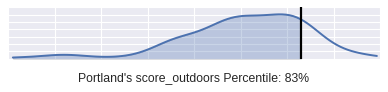

In [0]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# fig.patch.set_visible(False)
# ax.axis('off')
plt.style.use("seaborn")

# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

dist = redu_df['score_outdoors'].copy()
kde = stats.gaussian_kde(dist)

# plot complete kde curve as line
pos = np.linspace(dist.min(), dist.max(), 101)
plt.plot(pos, kde(pos))

# find value x of factor in specified city
city = 'Portland'
factor = 'score_outdoors'
x = redu_df.loc[redu_df['short_name'] == city][factor].tolist()[0]

# plot shaded kde only left of x
shade = np.linspace(dist.min(), x, 101)
plt.fill_between(shade,kde(shade), alpha=0.3)

# plt.figure(figsize=(6,2))
fig = plt.gcf()
fig.set_size_inches(6, .8)

plt.ylim(0,None)
# plt.show()

plt.axvline(x=x, color='black', lw=2)

moo = int(round(ranked_df.loc[ranked_df['short_name'] == city][factor].tolist()[0], 2)*100)
text = "{}'s {} Percentile: {}%".format(city, factor, moo)
plt.xlabel(text)

# import Image
plt.savefig('testplot.png')# , transparent=True)
# Image.open('testplot.png')

In [0]:
savefig('demo.png', transparent=True)

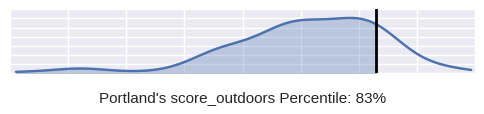

In [0]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def displot(df, city, factor):
    fig, ax = plt.subplots(dpi=200)
    # fig.patch.set_visible(False)
    # ax.axis('off')
    plt.style.use("seaborn")

    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    dist = redu_df['score_outdoors'].copy()
    kde = stats.gaussian_kde(dist)

    # plot complete kde curve as line
    pos = np.linspace(dist.min(), dist.max(), 101)
    plt.plot(pos, kde(pos))

    # find value x of factor in specified city
    x = redu_df.loc[redu_df['short_name'] == city][factor].tolist()[0]

    # plot shaded kde only left of x
    shade = np.linspace(dist.min(), x, 101)
    plt.fill_between(shade,kde(shade), alpha=0.3)

    # plt.figure(figsize=(3,1))
    fig = plt.gcf()
    fig.set_size_inches(6, .8)

    plt.ylim(0,None)
    # plt.show()

    plt.axvline(x=x, color='black', lw=2)

    moo = int(round(ranked_df.loc[ranked_df['short_name'] == city][factor].tolist()[0], 2)*100)
    text = "{}'s {} Percentile: {}%".format(city, factor, moo)
    plt.xlabel(text)

    return plt.savefig('testplot.png')

# example
displot(df=redu_df, city='Portland', factor='score_outdoors')

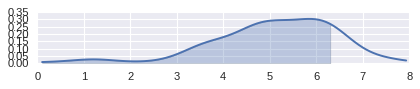

In [0]:
# Original way I shared with Justin

# import scipy.stats as stats
# import numpy as np
# import matplotlib.pyplot as plt

# def displot(df, city, factor):
#     plt.style.use("seaborn-darkgrid")

#     dist = df[factor].copy()
#     kde = stats.gaussian_kde(dist)

#     # plot complete kde curve as line
#     pos = np.linspace(dist.min(), dist.max(), 101)
#     plt.plot(pos, kde(pos))

#     # find value x of factor in specified city
#     x = redu_df.loc[df['short_name'] == city][factor].tolist()[0]

#     # plot shaded kde only left of x
#     shade = np.linspace(dist.min(), x, 101)
#     plt.fill_between(shade,kde(shade), alpha=0.3)

#     # plt.figure(figsize=(6, 2))
#     fig = plt.gcf()
#     fig.set_size_inches(6, .8)

#     plt.ylim(0, None)
#     return plt.savefig('testplot.png')

# # example
# displot(df=redu_df, city='Portland', factor='score_outdoors')

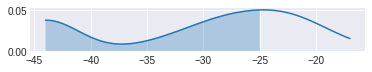

In [0]:
displot(df=redu_df, city='Portland', factor='avg_commute_time')

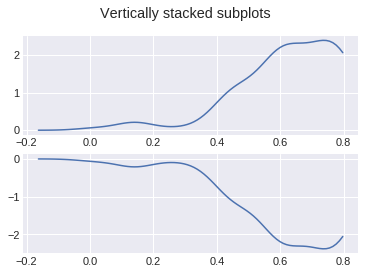

In [0]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

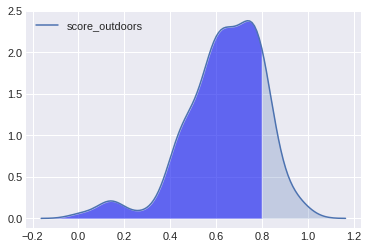

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dist = norm_df['score_outdoors'].copy()
ax = sns.kdeplot(dist, shade=True)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = x < 0.8
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='blue')
plt.show()

In [0]:
# When I'm ready to export csv ... 

from google.colab import files
ranked_df.to_csv('ranked_df.csv', index=False)

In [0]:
files.download('ranked_df.csv')

### Spider / Radar plots


In [0]:
ranked_df = pd.read_csv('https://github.com/Lambda-School-Labs/best-places-to-live-ds/raw/master/ranked_df.csv')

In [0]:
ranked_df.columns.to_list()

In [0]:
ranked_df['short_name'].to_list()


['Albuquerque',
 'Anchorage',
 'Atlanta',
 'Athens',
 'Sandy Springs',
 'Roswell',
 'Austin',
 'Round Rock',
 'Baltimore',
 'Columbia',
 'Birmingham',
 'Boise',
 'Boston',
 'South Boston',
 'Worcester',
 'Lowell',
 'Cambridge',
 'Brockton',
 'Quincy',
 'Boulder',
 'Buffalo',
 'Amherst',
 'Charleston',
 'North Charleston',
 'Charlotte',
 'Chattanooga',
 'East Chattanooga',
 'Chicago',
 'Aurora',
 'Joliet',
 'Naperville',
 'Elgin',
 'Cincinnati',
 'Cleveland',
 'Colorado Springs',
 'Columbus',
 'Dallas',
 'Fort Worth',
 'Arlington',
 'Plano',
 'Garland',
 'Irving',
 'Grand Prairie',
 'McKinney',
 'Frisco',
 'Mesquite',
 'Carrollton',
 'Denton',
 'Richardson',
 'Lewisville',
 'Allen',
 'Denver',
 'Aurora',
 'Lakewood',
 'Thornton',
 'Arvada',
 'Westminster',
 'Centennial',
 'Highlands Ranch',
 'Des Moines',
 'Detroit',
 'Eugene',
 'Fort Collins',
 'Honolulu',
 'Houston',
 'Pasadena',
 'Pearland',
 'Alief',
 'League City',
 'The Woodlands',
 'Indianapolis',
 'Jacksonville',
 'Kansas City',

In [0]:
# Example Features
x = ['cost_of_living', 'score_outdoors', 'score_education', 'score_commute', 'lgbt-index', 'drinking-water-quality-telescore', 'events-telescore']

In [0]:
city = 'Portland'
city2 = 'Dallas'
city3 = 'Minneapolis'
city4 = 'The Bronx'
city5 = 'San Diego'
factor = 'score_outdoors'

test = ranked_df.loc[ranked_df['short_name'] == city][x].T.reset_index() #[factor].tolist()[0]
test.columns = ['theta', 'r']
# test

test2 = ranked_df.loc[ranked_df['short_name'] == city2][x].T.reset_index() #[factor].tolist()[0]
test2.columns = ['theta', 'r']
test2

test3 = ranked_df.loc[ranked_df['short_name'] == city3][x].T.reset_index() #[factor].tolist()[0]
test3.columns = ['theta', 'r']

test4 = ranked_df.loc[ranked_df['short_name'] == city4][x].T.reset_index() #[factor].tolist()[0]
test4.columns = ['theta', 'r']

test5 = ranked_df.loc[ranked_df['short_name'] == city5][x].T.reset_index() #[factor].tolist()[0]
test5.columns = ['theta', 'r']
test5

,theta,r
0,cost_of_living,0.431641
1,score_outdoors,0.878906
2,score_education,0.515625
3,score_commute,0.734375
4,lgbt-index,0.765625
5,drinking-water-quality-telescore,0.304688
6,events-telescore,0.378906


In [0]:
import plotly.express as px

fig = px.line_polar(test, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [0]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=test['r'],
      theta=test['theta'],
      # fill='toself',
      name='Portland'
))
fig.add_trace(go.Scatterpolar(
      r=test2['r'],
      theta=test2['theta'],
      # fill='toself',
      name='Dallas'
))
fig.add_trace(go.Scatterpolar(
      r=test3['r'],
      theta=test3['theta'],
      # fill='toself',
      name='Minneapolis'
))
fig.add_trace(go.Scatterpolar(
      r=test4['r'],
      theta=test4['theta'],
      # fill='toself',
      name='The Bronx'
))
fig.add_trace(go.Scatterpolar(
      r=test5['r'],
      theta=test5['theta'],
      # fill='toself',
      name='San Diego'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      # range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [0]:
import pandas as pd
df9 = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
df9

,r,theta
0,1,processing cost
1,5,mechanical properties
2,2,chemical stability
3,2,thermal stability
4,3,device integration
